# Intensität in Bildebene

Quelle: https://www2.ph.ed.ac.uk/~wjh/teaching/mo/slides/lens/lens.pdf

In [2]:
import numpy as np
from matplotlib import pyplot as pp
from scipy.special import j1, sinc
from ipywidgets import interact, FloatSlider
import matplotlib.cm as cm

## Analytische Lösung

In [104]:
x_analytical = np.linspace(-15,15,2**10)
y_analytical = j1(x_analytical) / x_analytical

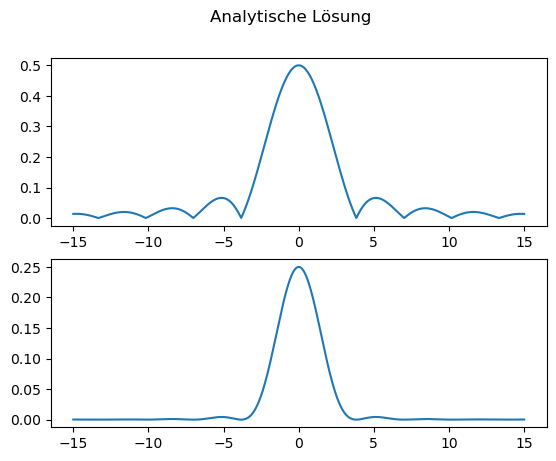

In [107]:
fig, axs = pp.subplots(2)
fig.suptitle('Analytische Lösung')
axs[0].plot(x_analytical, np.absolute(y_analytical))
axs[1].plot(x_analytical, y_analytical**2)
pp.show()

## Numerische Lösung

In [118]:
# Radius der Linse in xy-Ebene
r = 4

# Begrenzung der x und y Range
h = 5 


# Wellenlänge Licht 700nm (rot)
lmbda = 700 * 10**-9 

# Genauigkeit
N = 2**10

### Linsenparameter

In [119]:
# Brennweite der Linse
f = 10 

# Brechungsindex der Linse 
n = 4/3 

In [120]:
k = 2 * np.pi / lmbda
k

8975979.010256551

In [121]:
x_range = np.linspace(-h,h,N)
y_range = np.linspace(-h,h,N)


x, y = np.meshgrid(x_range, y_range)

### Lösen des Integral


In [122]:
p_filter = np.where(x**2 + y**2 <= r**2,1,0)

In [123]:
s = x
t = y 

In [124]:
ds = (x_range[-1] - x_range[0]) / N 
dt = (y_range[-1] - y_range[0]) / N 

ds_dt = np.ones(x.shape) * ds * dt

In [125]:
def u(x_0,y_0,s,t):
    integrand=np.exp(-1j*k/f*(x_0*s+y_0*t))
    return np.sum(p_filter*integrand*ds_dt)

### Berechnung für repäsentativen Bereich r_0

In [130]:
r_0 = 0.61*lmbda*f/r

samples = 2**6

g_range = np.linspace(-4*r_0, +4*r_0, samples)

u_x_0 = np.ones(samples,dtype=complex)

for x in range (0,samples):
    u_x_0[x] = u(g_range[x],0,s,t)/np.absolute(u(0,0,s,t))
    

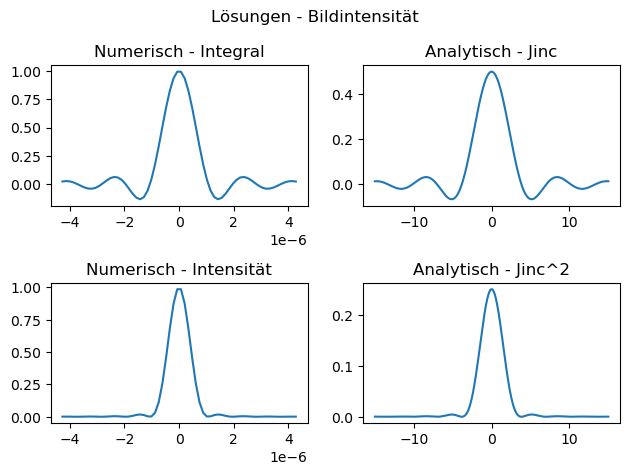

In [142]:
fig, axs = pp.subplots(2,2)
fig.suptitle('Lösungen - Bildintensität')
axs[0,0].plot(g_range,np.real(u_x_0))
axs[0,0].set_title('Numerisch - Integral')
axs[1,0].plot(g_range,u_x_0**2)
axs[1,0].set_title('Numerisch - Intensität')
axs[0,1].plot(x_analytical, y_analytical)
axs[0,1].set_title('Analytisch - Jinc')
axs[1,1].plot(x_analytical, y_analytical**2)
axs[1,1].set_title('Analytisch - Jinc^2')
fig.tight_layout()